In [1]:
import pandas as pd
import numpy as np

# Data preparation

In [2]:
def redefine_returns(data):
  data['returns']=np.exp(data['returns'])-1
  data['Rmkt']=np.exp(data['Rmkt'])-1

In [3]:
BTGm=pd.read_csv("/content/10min_BTG_cmk.csv")
EMC2m=pd.read_csv("/content/10min_ECM2_cmk.csv")
ELCm=pd.read_csv("/content/10min_ELC_cmk.csv")
ETCm=pd.read_csv("/content/10min_ETC_cmk.csv")
EXPm=pd.read_csv("/content/10min_EXP_cmk.csv")
KRBm=pd.read_csv("/content/10min_KRB_cmk.csv")
LTCm=pd.read_csv("/content/10min_LTC_cmk.csv")
MNCm=pd.read_csv("/content/10min_MNC_cmk.csv")
PINm=pd.read_csv("/content/10min_PIN_cmk.csv")
XVGm=pd.read_csv("/content/10min_XVG_cmk.csv")
XZCm=pd.read_csv("/content/10min_XZC_cmk.csv")
ZENm=pd.read_csv("/content/10min_ZEN_cmk.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/10min_BTG_cmk.csv'

In [34]:
BTGm['time']=pd.to_datetime(BTGm['time'])
EMC2m['time']=pd.to_datetime(EMC2m['time'])
ELCm['time']=pd.to_datetime(ELCm['time'])
ETCm['time']=pd.to_datetime(ETCm['time'])
EXPm['time']=pd.to_datetime(EXPm['time'])
KRBm['time']=pd.to_datetime(KRBm['time'])
LTCm['time']=pd.to_datetime(LTCm['time'])
MNCm['time']=pd.to_datetime(MNCm['time'])
PINm['time']=pd.to_datetime(PINm['time'])
XVGm['time']=pd.to_datetime(XVGm['time'])
XZCm['time']=pd.to_datetime(XZCm['time'])
ZENm['time']=pd.to_datetime(ZENm['time'])

In [35]:
def cumulative_return(data,col='returns',cumcol='CR'):
  data[cumcol]=data[col].cumsum()

In [36]:
def fill_nans_interpolation(data):
  # Interpolate in forward order across the column:
  data.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [37]:
redefine_returns(BTGm)
redefine_returns(EMC2m)
redefine_returns(ELCm)
redefine_returns(ETCm)
redefine_returns(EXPm)
redefine_returns(XZCm)
redefine_returns(ZENm)
redefine_returns(KRBm)
redefine_returns(LTCm)
redefine_returns(MNCm)
redefine_returns(PINm)
redefine_returns(XVGm)

In [38]:

BTGm['name']="Bitoin Gold"
EMC2m['name']="Einshteinium"
ELCm['name']="Electroneum"
ETCm['name']="Ethereum Classic"
EXPm['name']="Expance"
XZCm['name']="Zcoin(Firo)"
ZENm['name']="Zencoin(Horizon)"
KRBm['name']="Karbo"
LTCm['name']="Litecoin"
MNCm['name']="Monacoin"
PINm['name']="Public Index Network"
XVGm['name']="Verge"

In [39]:
from datetime import timedelta
def event_bool(t,event_dates):
  t=pd.to_datetime(t)
  k=0
  for d in event_dates :
    d=pd.to_datetime(d).tz_localize('UTC')
    if timedelta(hours=-12)<=t-d<timedelta(hours=12):
      k=1
  return k

In [40]:
def attack_column(data,attack_dates,col='attack'):
  data[col]=data['time'].apply(lambda x: event_bool(x, attack_dates))

In [41]:
def marketcap(data):
  data['marketcap']=data['close']*data['volume']

In [42]:
BTG_attack_dates=['2018-05-16 22:37:54','2020-01-23 18:01:32']
EMC2_attack_dates=['2019-01-06 12:00:00']
ELC_attack_dates=['2018-04-04 12:00:00']
ETC_attack_dates=['2019-01-04 03:27:11','2020-07-31 16:36:07','2020-08-06 02:54:27','2020-08-29 00:00:00']
EXP_attack_dates=['2019-07-29 12:00:00']
XZC_attack_dates=['2021-01-19 17:24:20']
ZEN_attack_dates=['2018-06-03 00:26:00']
KRB_attack_dates=['2018-10-11 12:00:00']
LTC_attack_dates=['2018-05-30 12:00:00','2019-06-04 12:00:00']
MNC_attack_dates=['2018-04-08 12:00:00','2018-05-15 12:00:00']
PIN_attack_dates=['2018-09-08 12:00:00']
XVG_attack_dates=['2018-04-04 06:00:00','2018-05-22 00:37:00']


In [43]:
attack_column(BTGm,BTG_attack_dates)
attack_column(EMC2m,EMC2_attack_dates)
attack_column(ELCm,ELC_attack_dates)
attack_column(ETCm,ETC_attack_dates)
attack_column(EXPm,EXP_attack_dates)
attack_column(XZCm,XZC_attack_dates)
attack_column(ZENm,ZEN_attack_dates)
attack_column(KRBm,KRB_attack_dates)
attack_column(LTCm,LTC_attack_dates)
attack_column(MNCm,MNC_attack_dates)
attack_column(PINm,PIN_attack_dates)
attack_column(XVGm,XVG_attack_dates)

In [44]:
All_data=pd.concat([BTGm,EMC2m,ELCm,ETCm,EXPm,XZCm,ZENm,KRBm,LTCm,MNCm,PINm,XVGm],axis=0)

In [45]:
import matplotlib.pyplot as plt
def LP_figure(shock_data,title='Response of cumulative returns to attack shocks using the response of returns to attack shocks'):
  T=shock_data['Horizon']
  plt.figure(figsize=(6,6))
  plt.plot(T,shock_data['C_effect'])
  plt.plot(T,shock_data['C_LB'],'g--')
  plt.plot(T,shock_data['C_UB'],'g--')
  plt.axhline(y=0, color='black', linestyle='--')
  plt.title(title)

# Using the PLP (panel local projections) predefined function

In [46]:
!pip install localprojections

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.6 MB/s eta 0:00:00


In [47]:
from statsmodels.datasets import grunfeld
import localprojections as lp
#For more information on the function check the documentation through the following link
#https://github.com/suahjl/localprojections

In [48]:
df = All_data[['attack','name','time','returns','Rmkt']]
df = df.set_index(['name', 'time'])

endog = ['returns','attack','Rmkt']
response = endog # estimate the responses of all variables to shocks from all variables
irf_horizon = 10 # estimate IRFs up to 10 periods ahead
opt_lags = 6 # include 6 lags in the local projections model
opt_cov = 'robust' # HAC standard errors
opt_ci = 0.95 # 95% confidence intervals

irf = lp.PanelLP(data=df, # input dataframe
                 Y=endog, # variables in the model
                 response=response, # variables whose IRFs should be estimated
                 horizon=irf_horizon, # estimation horizon of IRFs
                 lags=opt_lags, # lags in the model
                 varcov=opt_cov, # type of standard errors
                 ci_width=opt_ci # width of confidence band
                 )
irfplot = lp.IRFPlot(irf=irf, # take output from the estimated model
                     response=['returns'], # plot only response of invest ...
                     shock=endog, # ... to shocks from all variables
                     n_columns=2, # max 2 columns in the figure
                     n_rows=2, # max 2 rows in the figure
                     maintitle='Panel LP: IRFs of marketcap', # self-defined title of the IRF plot
                     show_fig=True, # display figure (from plotly)
                     save_pic=False # don't save any figures on local drive
                     )

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [49]:
result=irf[(irf['Response']=='returns') & ( irf['Shock']=='attack')][['Horizon','Mean','LB','UB']]
result=result.iloc[1:,:]
result['C_effect']=result['Mean'].cumsum()#reresents the cumulative mean effect
result['C_UB']=result['UB'].cumsum()#represents the cumulative upper born effect
result['C_LB']=result['LB'].cumsum()#represents the cumulative lower born effect
for col in ["Mean", "LB",   "UB",   "C_effect",'C_LB','C_UB']:
  result[col]=np.exp(result[col])-1
result

,Horizon,Mean,LB,UB,C_effect,C_UB,C_LB
0,1,0.011109,-0.014844,0.037746,0.011109,0.037746,-0.014844
0,2,0.022709,0.001262,0.044615,0.034071,0.084045,-0.013601
0,3,-0.000133,-0.023217,0.023498,0.033933,0.109518,-0.036502
0,4,-0.008485,-0.030376,0.013900,0.025160,0.124941,-0.065770
0,5,-0.015088,-0.040981,0.011505,0.009693,0.137884,-0.104056
0,6,0.003343,-0.023502,0.030926,0.013069,0.173074,-0.125112
0,7,0.010722,-0.014804,0.036911,0.023931,0.216373,-0.138065
0,8,-0.014228,-0.044118,0.016596,0.009362,0.236560,-0.176092
0,9,0.003444,-0.025728,0.033488,0.012838,0.277970,-0.197289
0,10,-0.025183,-0.062648,0.013780,-0.012668,0.295580,-0.247577


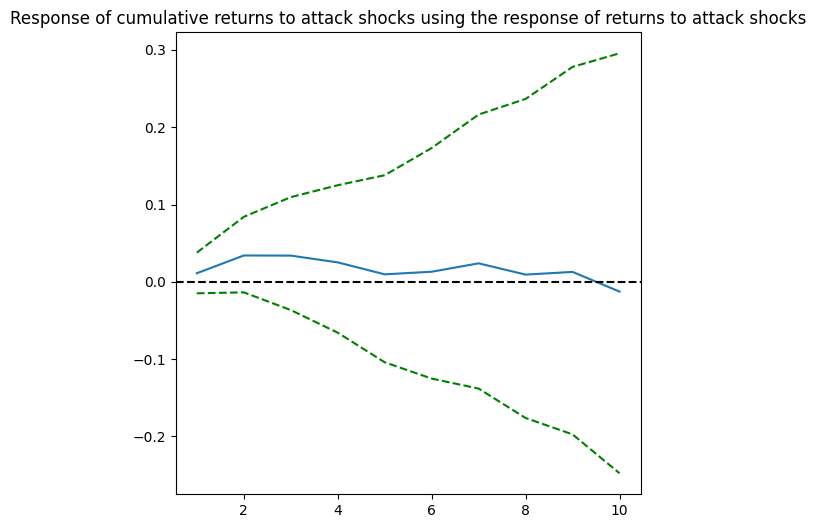

In [50]:
LP_figure(result)

#seperating datasets (using time series local projections)

In [51]:
df = BTGm.set_index(['name', 'time'])

endog = ['returns','Rmkt','attack']
response = endog # estimate the responses of all variables to shocks from all variables
irf_horizon = 10 # estimate IRFs up to 10 periods ahead
opt_lags = 6 # include 6 lags in the local projections model
opt_cov = 'robust' # HAC standard errors
opt_ci = 0.95 # 95% confidence intervals

# Use TimeSeriesLP for the single entity case
irf = lp.TimeSeriesLP(data=df, # input dataframe
                      Y=endog, # variables in the model
                      response=response, # variables whose IRFs should be estimated
                      horizon=irf_horizon, # estimation horizon of IRFs
                      lags=opt_lags, # lags in the model
                      newey_lags=2, # maximum lags when estimating Newey-West standard errors
                      ci_width=opt_ci # width of confidence band
                      )
irfplot = lp.IRFPlot(irf=irf, # take output from the estimated model
                     response=['returns'], # plot only response of invest ...
                     shock=endog, # ... to shocks from all variables
                     n_columns=2, # max 2 columns in the figure
                     n_rows=2, # max 2 rows in the figure
                     maintitle='Single Entity Time Series LP: IRFs of BTG returns', # self-defined title of the IRF plot
                     show_fig=True, # display figure (from plotly)
                     save_pic=False # don't save any figures on local drive
                     )

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [52]:
result=irf[(irf['Response']=='returns') & ( irf['Shock']=='attack')][['Horizon','Mean','LB','UB']]
result=result.iloc[1:,:]
result['C_effect']=result['Mean'].cumsum()
result['C_UB']=result['UB'].cumsum()
result['C_LB']=result['LB'].cumsum()
for col in ["Mean",	"LB",	"UB",	"C_effect",'C_LB','C_UB']:
  result[col]=np.exp(result[col])-1
attack_shock=result
result

,Horizon,Mean,LB,UB,C_effect,C_UB,C_LB
0,1,0.043761,-0.039751,0.134537,0.043761,0.134537,-0.039751
0,2,0.087554,0.061860,0.113870,0.135147,0.263726,0.019650
0,3,-0.018090,-0.045966,0.010600,0.114612,0.277122,-0.027220
0,4,-0.014505,-0.054785,0.027493,0.098445,0.312234,-0.080514
0,5,-0.034684,-0.098959,0.034176,0.060346,0.357080,-0.171505
0,6,0.003076,-0.050516,0.059693,0.063608,0.438088,-0.213357
0,7,-0.022626,-0.050077,0.005618,0.039542,0.446167,-0.252750
0,8,-0.014102,-0.029590,0.001634,0.024882,0.448529,-0.274862
0,9,0.019019,-0.034066,0.075020,0.044374,0.557198,-0.299564
0,10,-0.085702,-0.109045,-0.061747,-0.045131,0.461046,-0.375943


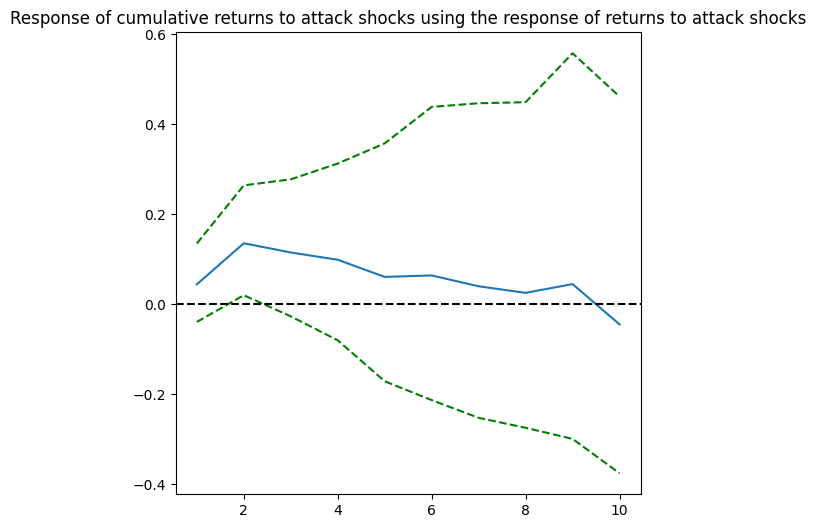

In [53]:
LP_figure(attack_shock)

In [54]:
df = ETCm.set_index(['name', 'time'])

endog = ['returns','Rmkt','attack']
response = endog # estimate the responses of all variables to shocks from all variables
irf_horizon = 10 # estimate IRFs up to 10 periods ahead
opt_lags = 6 # include 6 lags in the local projections model
opt_cov = 'robust' # HAC standard errors
opt_ci = 0.95 # 95% confidence intervals

# Use TimeSeriesLP for the single entity case
irf = lp.TimeSeriesLP(data=df, # input dataframe
                      Y=endog, # variables in the model
                      response=response, # variables whose IRFs should be estimated
                      horizon=irf_horizon, # estimation horizon of IRFs
                      lags=opt_lags, # lags in the model
                      newey_lags=2, # maximum lags when estimating Newey-West standard errors
                      ci_width=opt_ci # width of confidence band
                      )
irfplot = lp.IRFPlot(irf=irf, # take output from the estimated model
                     response=['returns'], # plot only response of invest ...
                     shock=endog, # ... to shocks from all variables
                     n_columns=2, # max 2 columns in the figure
                     n_rows=2, # max 2 rows in the figure
                     maintitle='Single Entity Time Series LP: IRFs of ETC returns', # self-defined title of the IRF plot
                     show_fig=True, # display figure (from plotly)
                     save_pic=False # don't save any figures on local drive
                     )

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [55]:
result=irf[(irf['Response']=='returns') & ( irf['Shock']=='attack')][['Horizon','Mean','LB','UB']]
result=result.iloc[1:,:]
result['C_effect']=result['Mean'].cumsum()
result['C_UB']=result['UB'].cumsum()
result['C_LB']=result['LB'].cumsum()
for col in ["Mean",	"LB",	"UB",	"C_effect",'C_LB','C_UB']:
  result[col]=np.exp(result[col])-1
attack_shock=result
result

,Horizon,Mean,LB,UB,C_effect,C_UB,C_LB
0,1,0.031418,-0.008726,0.073186,0.031418,0.073186,-0.008726
0,2,-0.010692,-0.061468,0.042832,0.020390,0.119153,-0.069658
0,3,0.007512,-0.029758,0.046213,0.028054,0.170872,-0.097343
0,4,-0.032637,-0.071490,0.007842,-0.005498,0.180054,-0.161874
0,5,-0.043364,-0.078361,-0.007039,-0.048624,0.171748,-0.227550
0,6,-0.006748,-0.035092,0.022428,-0.055044,0.198028,-0.254657
0,7,0.005325,-0.018128,0.029337,-0.050013,0.233175,-0.268169
0,8,-0.005825,-0.040182,0.029763,-0.055546,0.269877,-0.297575
0,9,-0.000505,-0.023386,0.022912,-0.056023,0.298973,-0.314002
0,10,-0.010682,-0.027670,0.006603,-0.066107,0.307550,-0.332984


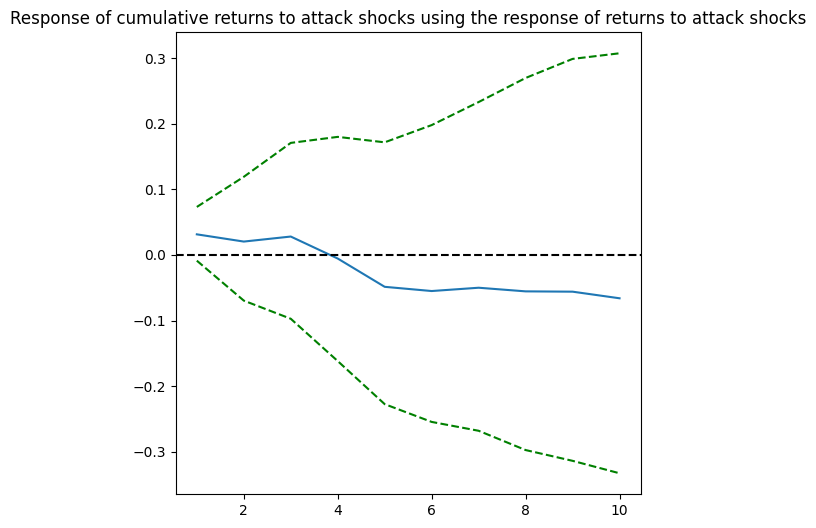

In [56]:
LP_figure(attack_shock)

In [57]:
df = XVGm.set_index(['name', 'time'])

endog = ['returns','Rmkt','attack']
response = endog # estimate the responses of all variables to shocks from all variables
irf_horizon = 10 # estimate IRFs up to 10 periods ahead
opt_lags = 6 # include 6 lags in the local projections model
opt_cov = 'robust' # HAC standard errors
opt_ci = 0.95 # 95% confidence intervals

# Use TimeSeriesLP for the single entity case
irf = lp.TimeSeriesLP(data=df, # input dataframe
                      Y=endog, # variables in the model
                      response=response, # variables whose IRFs should be estimated
                      horizon=irf_horizon, # estimation horizon of IRFs
                      lags=opt_lags, # lags in the model
                      newey_lags=2, # maximum lags when estimating Newey-West standard errors
                      ci_width=opt_ci # width of confidence band
                      )
irfplot = lp.IRFPlot(irf=irf, # take output from the estimated model
                     response=['returns'], # plot only response of invest ...
                     shock=endog, # ... to shocks from all variables
                     n_columns=2, # max 2 columns in the figure
                     n_rows=2, # max 2 rows in the figure
                     maintitle='Single Entity Time Series LP: IRFs of XVG returns', # self-defined title of the IRF plot
                     show_fig=True, # display figure (from plotly)
                     save_pic=False # don't save any figures on local drive
                     )

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [58]:
result=irf[(irf['Response']=='returns') & ( irf['Shock']=='attack')][['Horizon','Mean','LB','UB']]
result=result.iloc[1:,:]
result['C_effect']=result['Mean'].cumsum()
result['C_UB']=result['UB'].cumsum()
result['C_LB']=result['LB'].cumsum()
for col in ["Mean",	"LB",	"UB",	"C_effect",'C_LB','C_UB']:
  result[col]=np.exp(result[col])-1
attack_shock=result
result

,Horizon,Mean,LB,UB,C_effect,C_UB,C_LB
0,1,0.031670,-0.031997,0.099525,0.031670,0.099525,-0.031997
0,2,-0.003422,-0.092657,0.094590,0.028140,0.203529,-0.121690
0,3,-0.007985,-0.064532,0.051980,0.019930,0.266089,-0.178369
0,4,0.046623,-0.035496,0.135734,0.067483,0.437940,-0.207533
0,5,-0.028849,-0.153543,0.114214,0.036687,0.602173,-0.329211
0,6,0.041153,-0.038409,0.127298,0.079350,0.806126,-0.354975
0,7,0.048777,-0.030518,0.134556,0.131997,1.049152,-0.374659
0,8,0.034850,0.001364,0.069455,0.171447,1.191476,-0.373806
0,9,-0.007819,-0.049270,0.035439,0.162288,1.269140,-0.404659
0,10,0.068653,0.033343,0.105170,0.242082,1.507785,-0.384809


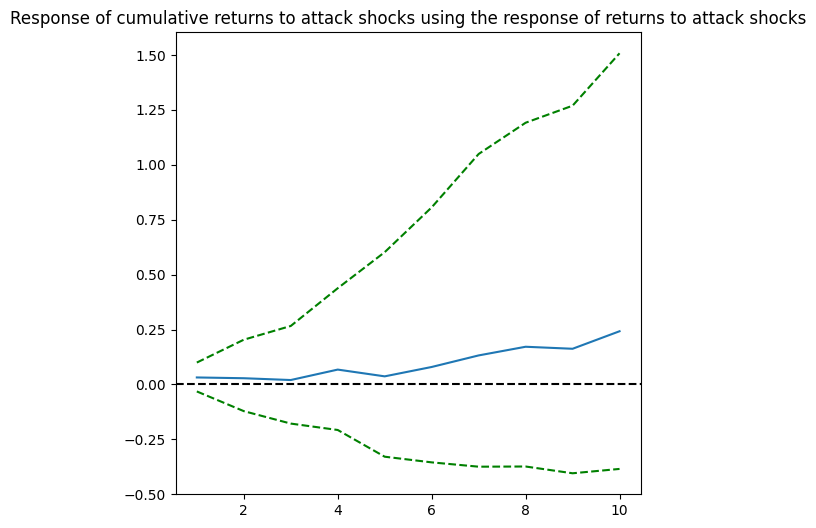

In [59]:
LP_figure(attack_shock)

In [60]:
df = XZCm.set_index(['name', 'time'])

endog = ['returns','Rmkt','attack']
response = endog # estimate the responses of all variables to shocks from all variables
irf_horizon = 10 # estimate IRFs up to 10 periods ahead
opt_lags = 6 # include 6 lags in the local projections model
opt_cov = 'robust' # HAC standard errors
opt_ci = 0.95 # 95% confidence intervals

# Use TimeSeriesLP for the single entity case
irf = lp.TimeSeriesLP(data=df, # input dataframe
                      Y=endog, # variables in the model
                      response=response, # variables whose IRFs should be estimated
                      horizon=irf_horizon, # estimation horizon of IRFs
                      lags=opt_lags, # lags in the model
                      newey_lags=2, # maximum lags when estimating Newey-West standard errors
                      ci_width=opt_ci # width of confidence band
                      )
irfplot = lp.IRFPlot(irf=irf, # take output from the estimated model
                     response=['returns'], # plot only response of invest ...
                     shock=endog, # ... to shocks from all variables
                     n_columns=2, # max 2 columns in the figure
                     n_rows=2, # max 2 rows in the figure
                     maintitle='Single Entity Time Series LP: IRFs of XZC returns', # self-defined title of the IRF plot
                     show_fig=True, # display figure (from plotly)
                     save_pic=False # don't save any figures on local drive
                     )

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [61]:
result=irf[(irf['Response']=='returns') & ( irf['Shock']=='attack')][['Horizon','Mean','LB','UB']]
result=result.iloc[1:,:]
result['C_effect']=result['Mean'].cumsum()
result['C_UB']=result['UB'].cumsum()
result['C_LB']=result['LB'].cumsum()
for col in ["Mean",	"LB",	"UB",	"C_effect",'C_LB','C_UB']:
  result[col]=np.exp(result[col])-1
attack_shock=result
result

,Horizon,Mean,LB,UB,C_effect,C_UB,C_LB
0,1,-0.001595,-0.029452,0.027062,-0.001595,0.027062,-0.029452
0,2,-0.001028,-0.033655,0.032700,-0.002621,0.060647,-0.062115
0,3,0.003025,-0.025514,0.032400,0.000396,0.095011,-0.086044
0,4,0.004768,-0.023428,0.033778,0.005166,0.131998,-0.107457
0,5,-0.043337,-0.078660,-0.006660,-0.038395,0.124459,-0.177664
0,6,0.073008,0.043210,0.103657,0.031809,0.241017,-0.142131
0,7,-0.014376,-0.041298,0.013303,0.016976,0.257525,-0.177558
0,8,0.108995,0.076857,0.142093,0.127822,0.436210,-0.114348
0,9,-0.097819,-0.120397,-0.074662,0.017499,0.328980,-0.220978
0,10,-0.058702,-0.104584,-0.010469,-0.042230,0.315067,-0.302452


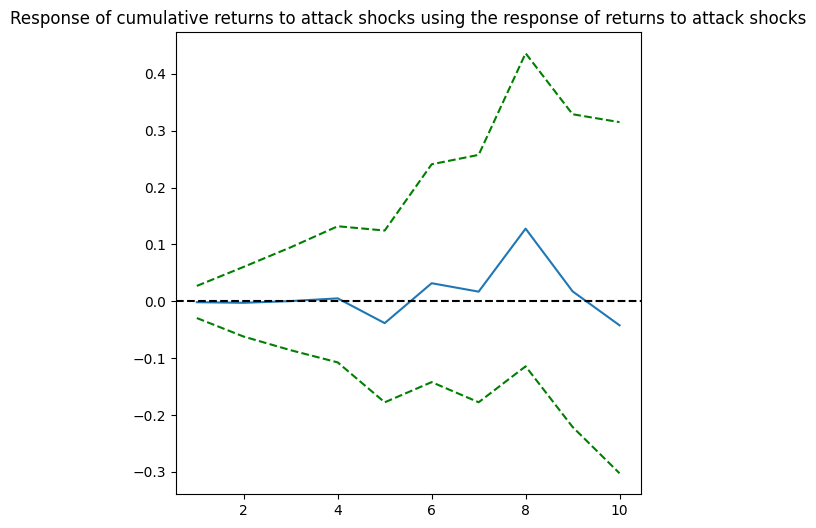

In [62]:
LP_figure(attack_shock)

In [63]:
df = ZENm.set_index(['name', 'time'])

endog = ['returns','Rmkt','attack']
response = endog # estimate the responses of all variables to shocks from all variables
irf_horizon = 10 # estimate IRFs up to 10 periods ahead
opt_lags = 6 # include 6 lags in the local projections model
opt_cov = 'robust' # HAC standard errors
opt_ci = 0.95 # 95% confidence intervals

# Use TimeSeriesLP for the single entity case
irf = lp.TimeSeriesLP(data=df, # input dataframe
                      Y=endog, # variables in the model
                      response=response, # variables whose IRFs should be estimated
                      horizon=irf_horizon, # estimation horizon of IRFs
                      lags=opt_lags, # lags in the model
                      newey_lags=2, # maximum lags when estimating Newey-West standard errors
                      ci_width=opt_ci # width of confidence band
                      )
irfplot = lp.IRFPlot(irf=irf, # take output from the estimated model
                     response=['returns'], # plot only response of invest ...
                     shock=endog, # ... to shocks from all variables
                     n_columns=2, # max 2 columns in the figure
                     n_rows=2, # max 2 rows in the figure
                     maintitle='Single Entity Time Series LP: IRFs of ZEN returns', # self-defined title of the IRF plot
                     show_fig=True, # display figure (from plotly)
                     save_pic=False # don't save any figures on local drive
                     )

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [64]:
result=irf[(irf['Response']=='returns') & ( irf['Shock']=='attack')][['Horizon','Mean','LB','UB']]
result=result.iloc[1:,:]
result['C_effect']=result['Mean'].cumsum()
result['C_UB']=result['UB'].cumsum()
result['C_LB']=result['LB'].cumsum()
for col in ["Mean",	"LB",	"UB",	"C_effect",'C_LB','C_UB']:
  result[col]=np.exp(result[col])-1
attack_shock=result
result

,Horizon,Mean,LB,UB,C_effect,C_UB,C_LB
0,1,-0.070543,-0.139742,0.004221,-0.070543,0.004221,-0.139742
0,2,0.007160,-0.064505,0.084316,-0.063888,0.088893,-0.195233
0,3,0.051430,-0.015269,0.122648,-0.015743,0.222444,-0.207521
0,4,0.005905,-0.032947,0.046318,-0.009932,0.279065,-0.233631
0,5,-0.037295,-0.076238,0.003291,-0.046856,0.283274,-0.292057
0,6,-0.148454,-0.171150,-0.125137,-0.188354,0.122689,-0.413222
0,7,0.069756,0.044927,0.095176,-0.131736,0.229542,-0.386860
0,8,-0.102542,-0.113163,-0.091794,-0.220770,0.116677,-0.456244
0,9,-0.020643,-0.051487,0.011204,-0.236855,0.129188,-0.484241
0,10,0.109316,0.074472,0.145291,-0.153431,0.293249,-0.445831


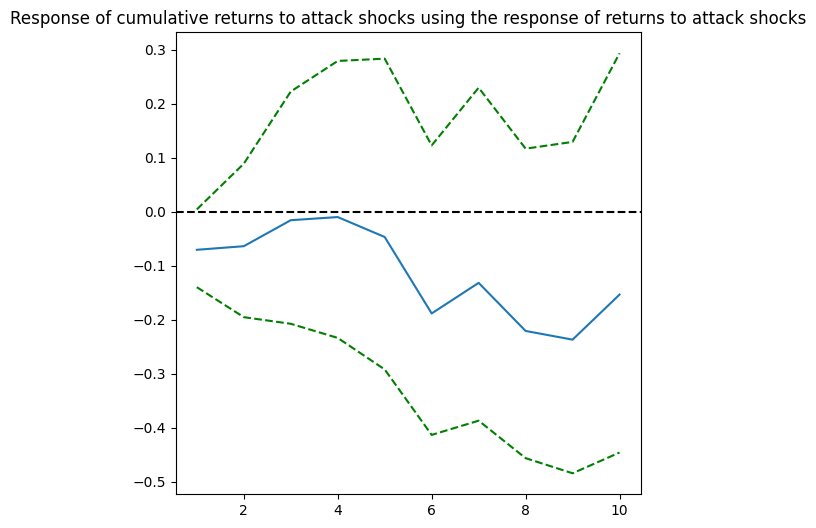

In [65]:
LP_figure(attack_shock)

In [66]:
df = EMC2m.set_index(['name', 'time'])

endog = ['returns','Rmkt','attack']
response = endog # estimate the responses of all variables to shocks from all variables
irf_horizon = 10 # estimate IRFs up to 10 periods ahead
opt_lags = 6 # include 6 lags in the local projections model
opt_cov = 'robust' # HAC standard errors
opt_ci = 0.95 # 95% confidence intervals

# Use TimeSeriesLP for the single entity case
irf = lp.TimeSeriesLP(data=df, # input dataframe
                      Y=endog, # variables in the model
                      response=response, # variables whose IRFs should be estimated
                      horizon=irf_horizon, # estimation horizon of IRFs
                      lags=opt_lags, # lags in the model
                      newey_lags=2, # maximum lags when estimating Newey-West standard errors
                      ci_width=opt_ci # width of confidence band
                      )
irfplot = lp.IRFPlot(irf=irf, # take output from the estimated model
                     response=['returns'], # plot only response of invest ...
                     shock=endog, # ... to shocks from all variables
                     n_columns=2, # max 2 columns in the figure
                     n_rows=2, # max 2 rows in the figure
                     maintitle='Single Entity Time Series LP: IRFs of ECM2 returns', # self-defined title of the IRF plot
                     show_fig=True, # display figure (from plotly)
                     save_pic=False # don't save any figures on local drive
                     )

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [67]:
result=irf[(irf['Response']=='returns') & ( irf['Shock']=='attack')][['Horizon','Mean','LB','UB']]
result=result.iloc[1:,:]
result['C_effect']=result['Mean'].cumsum()
result['C_UB']=result['UB'].cumsum()
result['C_LB']=result['LB'].cumsum()
for col in ["Mean",	"LB",	"UB",	"C_effect",'C_LB','C_UB']:
  result[col]=np.exp(result[col])-1
attack_shock=result
result

,Horizon,Mean,LB,UB,C_effect,C_UB,C_LB
0,1,0.005411,-0.050130,0.064200,0.005411,0.064200,-0.050130
0,2,0.037998,-0.012402,0.090970,0.043614,0.161010,-0.061911
0,3,-0.132574,-0.162719,-0.101343,-0.094742,0.043350,-0.214556
0,4,0.021065,0.010371,0.031872,-0.075672,0.076604,-0.206410
0,5,-0.018285,-0.027979,-0.008494,-0.092574,0.067459,-0.228615
0,6,-0.082259,-0.098865,-0.065348,-0.167218,-0.002297,-0.304877
0,7,0.017654,-0.005746,0.041605,-0.152516,0.039212,-0.308871
0,8,-0.010904,-0.030356,0.008937,-0.161757,0.048500,-0.329851
0,9,0.054380,0.039077,0.069909,-0.116173,0.121799,-0.303663
0,10,0.001691,-0.006005,0.009448,-0.114678,0.132398,-0.307845


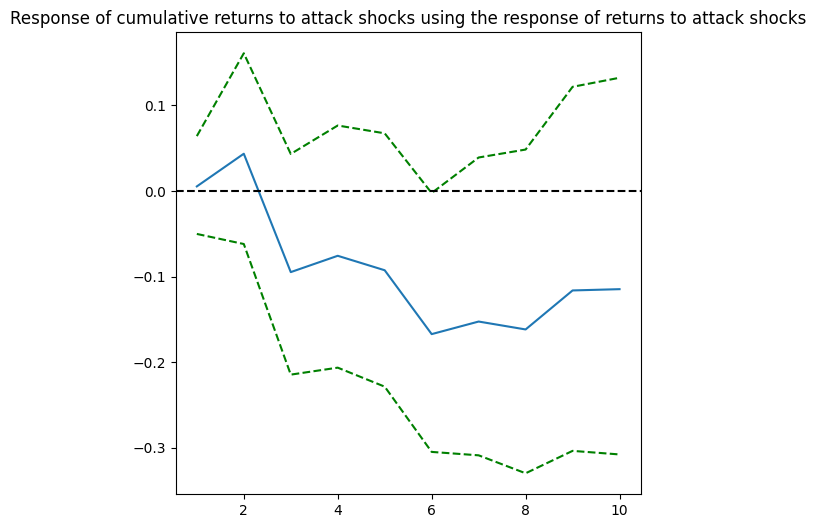

In [68]:
LP_figure(attack_shock)

In [69]:
df = ELCm.set_index(['name', 'time'])

endog = ['returns','Rmkt','attack']
response = endog # estimate the responses of all variables to shocks from all variables
irf_horizon = 10 # estimate IRFs up to 10 periods ahead
opt_lags = 6 # include 6 lags in the local projections model
opt_cov = 'robust' # HAC standard errors
opt_ci = 0.95 # 95% confidence intervals

# Use TimeSeriesLP for the single entity case
irf = lp.TimeSeriesLP(data=df, # input dataframe
                      Y=endog, # variables in the model
                      response=response, # variables whose IRFs should be estimated
                      horizon=irf_horizon, # estimation horizon of IRFs
                      lags=opt_lags, # lags in the model
                      newey_lags=2, # maximum lags when estimating Newey-West standard errors
                      ci_width=opt_ci # width of confidence band
                      )
irfplot = lp.IRFPlot(irf=irf, # take output from the estimated model
                     response=['returns'], # plot only response of invest ...
                     shock=endog, # ... to shocks from all variables
                     n_columns=2, # max 2 columns in the figure
                     n_rows=2, # max 2 rows in the figure
                     maintitle='Single Entity Time Series LP: IRFs of ELC returns', # self-defined title of the IRF plot
                     show_fig=True, # display figure (from plotly)
                     save_pic=False # don't save any figures on local drive
                     )

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [70]:
result=irf[(irf['Response']=='returns') & ( irf['Shock']=='attack')][['Horizon','Mean','LB','UB']]
result=result.iloc[1:,:]
result['C_effect']=result['Mean'].cumsum()
result['C_UB']=result['UB'].cumsum()
result['C_LB']=result['LB'].cumsum()
for col in ["Mean",	"LB",	"UB",	"C_effect",'C_LB','C_UB']:
  result[col]=np.exp(result[col])-1
attack_shock=result
result

,Horizon,Mean,LB,UB,C_effect,C_UB,C_LB
0,1,0.089619,0.036617,0.145331,0.089619,0.145331,0.036617
0,2,-0.006480,-0.042075,0.030437,0.082558,0.180192,-0.006999
0,3,0.001023,-0.035379,0.038798,0.083665,0.225980,-0.042130
0,4,-0.070227,-0.101837,-0.037505,0.007562,0.180000,-0.139677
0,5,-0.007815,-0.036935,0.022186,-0.000312,0.206179,-0.171453
0,6,-0.002793,-0.042185,0.038219,-0.003104,0.252279,-0.206405
0,7,0.107486,0.067098,0.149403,0.104049,0.439373,-0.153156
0,8,0.062860,0.033512,0.093042,0.173449,0.573294,-0.124777
0,9,-0.035380,-0.068662,-0.000909,0.131933,0.571864,-0.184872
0,10,0.010513,-0.016828,0.038615,0.143833,0.632561,-0.198589


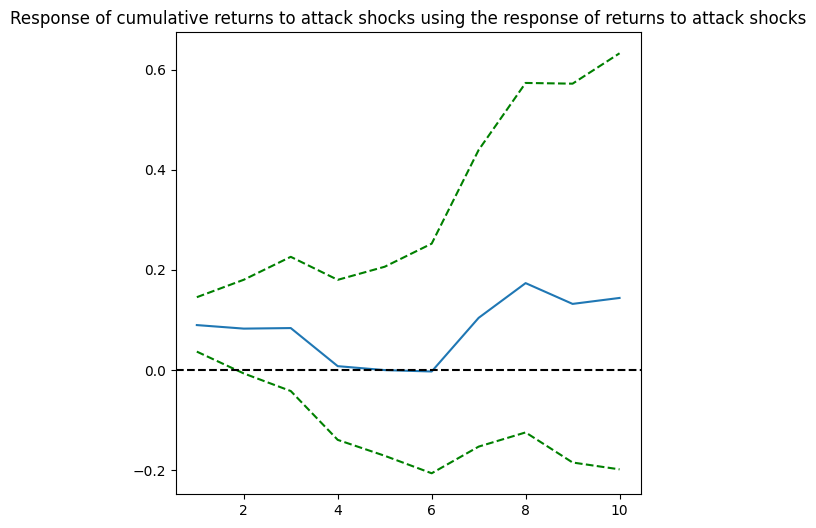

In [71]:
LP_figure(attack_shock)

In [72]:
df = EXPm.set_index(['name', 'time']) # set entity-year indices (as per requirements in bashtage's linearmodels)

endog = ['returns','Rmkt','attack']
response = endog
irf_horizon = 10 # estimate IRFs up to 10 periods ahead
opt_lags = 6 # include 6 lags in the local projections model
opt_cov = 'robust' # HAC standard errors
opt_ci = 0.95 # 95% confidence intervals

# Use TimeSeriesLP for the single entity case
irf = lp.TimeSeriesLP(data=df, # input dataframe
                      Y=endog, # variables in the model
                      response=response, # variables whose IRFs should be estimated
                      horizon=irf_horizon, # estimation horizon of IRFs
                      lags=opt_lags, # lags in the model
                      newey_lags=2, # maximum lags when estimating Newey-West standard errors
                      ci_width=opt_ci # width of confidence band
                      )
irfplot = lp.IRFPlot(irf=irf, # take output from the estimated model
                     response=['returns'], # plot only response of invest ...
                     shock=endog, # ... to shocks from all variables
                     n_columns=2, # max 2 columns in the figure
                     n_rows=2, # max 2 rows in the figure
                     maintitle='Single Entity Time Series LP: IRFs of ZEN returns', # self-defined title of the IRF plot
                     show_fig=True, # display figure (from plotly)
                     save_pic=False # don't save any figures on local drive
                     )

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [73]:
result=irf[(irf['Response']=='returns') & ( irf['Shock']=='attack')][['Horizon','Mean','LB','UB']]
result=result.iloc[1:,:]
result['C_effect']=result['Mean'].cumsum()
result['C_UB']=result['UB'].cumsum()
result['C_LB']=result['LB'].cumsum()
for col in ["Mean",	"LB",	"UB",	"C_effect",'C_LB','C_UB']:
  result[col]=np.exp(result[col])-1
attack_shock=result
result

,Horizon,Mean,LB,UB,C_effect,C_UB,C_LB
0,1,0.020001,-0.045045,0.089477,0.020001,0.089477,-0.045045
0,2,0.001848,-0.048430,0.054784,0.021886,0.149163,-0.091294
0,3,0.015611,-0.017697,0.050048,0.037838,0.206676,-0.107376
0,4,0.004370,-0.088919,0.107213,0.042374,0.336047,-0.186747
0,5,0.096374,-0.026368,0.234589,0.142832,0.649469,-0.208191
0,6,0.090917,-0.019438,0.213692,0.246735,1.001948,-0.223582
0,7,-0.044194,-0.150176,0.075006,0.191637,1.152106,-0.340182
0,8,0.057413,0.016212,0.100286,0.260053,1.367931,-0.329485
0,9,-0.012673,-0.092343,0.073989,0.244084,1.543133,-0.391403
0,10,-0.208694,-0.292686,-0.114728,-0.015549,1.251365,-0.569530


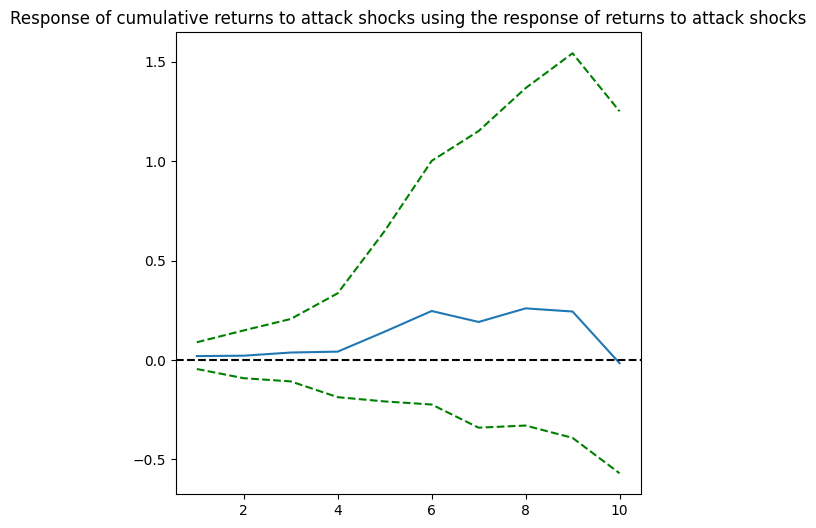

In [74]:
LP_figure(attack_shock)

In [75]:
df = KRBm.set_index(['name', 'time'])

endog = ['returns','Rmkt','attack']
response = endog # estimate the responses of all variables to shocks from all variables
irf_horizon = 10 # estimate IRFs up to 10 periods ahead
opt_lags = 6 # include 6 lags in the local projections model
opt_cov = 'robust' # HAC standard errors
opt_ci = 0.95 # 95% confidence intervals

# Use TimeSeriesLP for the single entity case
irf = lp.TimeSeriesLP(data=df, # input dataframe
                      Y=endog, # variables in the model
                      response=response, # variables whose IRFs should be estimated
                      horizon=irf_horizon, # estimation horizon of IRFs
                      lags=opt_lags, # lags in the model
                      newey_lags=2, # maximum lags when estimating Newey-West standard errors
                      ci_width=opt_ci # width of confidence band
                      )
irfplot = lp.IRFPlot(irf=irf, # take output from the estimated model
                     response=['returns'], # plot only response of invest ...
                     shock=endog, # ... to shocks from all variables
                     n_columns=2, # max 2 columns in the figure
                     n_rows=2, # max 2 rows in the figure
                     maintitle='Single Entity Time Series LP: IRFs of ZEN returns', # self-defined title of the IRF plot
                     show_fig=True, # display figure (from plotly)
                     save_pic=False # don't save any figures on local drive
                     )

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [76]:
result=irf[(irf['Response']=='returns') & ( irf['Shock']=='attack')][['Horizon','Mean','LB','UB']]
result=result.iloc[1:,:]
result['C_effect']=result['Mean'].cumsum()
result['C_UB']=result['UB'].cumsum()
result['C_LB']=result['LB'].cumsum()
for col in ["Mean",	"LB",	"UB",	"C_effect",'C_LB','C_UB']:
  result[col]=np.exp(result[col])-1
attack_shock=result
result

,Horizon,Mean,LB,UB,C_effect,C_UB,C_LB
0,1,-0.052727,-0.076463,-0.028381,-0.052727,-0.028381,-0.076463
0,2,0.026379,-0.000484,0.053964,-0.027739,0.024051,-0.076909
0,3,-0.030805,-0.062867,0.002353,-0.057690,0.026461,-0.134942
0,4,0.023765,0.002825,0.045141,-0.035296,0.072797,-0.132498
0,5,0.017286,-0.002761,0.037735,-0.018620,0.113278,-0.134892
0,6,-0.030170,-0.049351,-0.010603,-0.048229,0.101475,-0.177586
0,7,0.030366,0.013188,0.047834,-0.019328,0.154162,-0.166740
0,8,-0.065750,-0.087578,-0.043400,-0.083807,0.104072,-0.239715
0,9,-0.003193,-0.022572,0.016570,-0.086733,0.122366,-0.256876
0,10,0.038360,0.018955,0.058135,-0.051700,0.187615,-0.242790


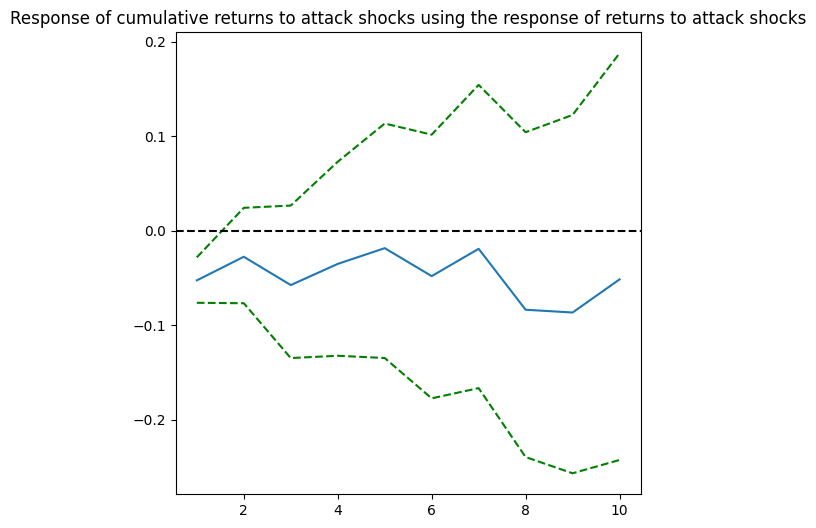

In [77]:
LP_figure(attack_shock)

In [78]:
df = LTCm.set_index(['name', 'time'])

endog = ['returns','Rmkt','attack']
response = endog # estimate the responses of all variables to shocks from all variables
irf_horizon = 10 # estimate IRFs up to 10 periods ahead
opt_lags = 6 # include 6 lags in the local projections model
opt_cov = 'robust' # HAC standard errors
opt_ci = 0.95 # 95% confidence intervals

# Use TimeSeriesLP for the single entity case
irf = lp.TimeSeriesLP(data=df, # input dataframe
                      Y=endog, # variables in the model
                      response=response, # variables whose IRFs should be estimated
                      horizon=irf_horizon, # estimation horizon of IRFs
                      lags=opt_lags, # lags in the model
                      newey_lags=2, # maximum lags when estimating Newey-West standard errors
                      ci_width=opt_ci # width of confidence band
                      )
irfplot = lp.IRFPlot(irf=irf, # take output from the estimated model
                     response=['returns'], # plot only response of invest ...
                     shock=endog, # ... to shocks from all variables
                     n_columns=2, # max 2 columns in the figure
                     n_rows=2, # max 2 rows in the figure
                     maintitle='Single Entity Time Series LP: IRFs of ZEN returns', # self-defined title of the IRF plot
                     show_fig=True, # display figure (from plotly)
                     save_pic=False # don't save any figures on local drive
                     )

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [79]:
result=irf[(irf['Response']=='returns') & ( irf['Shock']=='attack')][['Horizon','Mean','LB','UB']]
result=result.iloc[1:,:]
result['C_effect']=result['Mean'].cumsum()
result['C_UB']=result['UB'].cumsum()
result['C_LB']=result['LB'].cumsum()
for col in ["Mean",	"LB",	"UB",	"C_effect",'C_LB','C_UB']:
  result[col]=np.exp(result[col])-1
attack_shock=result
result

,Horizon,Mean,LB,UB,C_effect,C_UB,C_LB
0,1,0.023268,-0.014512,0.062496,0.023268,0.062496,-0.014512
0,2,0.035275,-0.000178,0.071985,0.059363,0.138980,-0.014688
0,3,0.010426,-0.008690,0.029911,0.070408,0.173047,-0.023250
0,4,-0.045891,-0.065715,-0.025646,0.021286,0.142963,-0.087438
0,5,0.065664,-0.001150,0.136948,0.088348,0.299489,-0.088487
0,6,0.029830,-0.008112,0.069224,0.120813,0.389444,-0.095882
0,7,0.022644,-0.010814,0.057232,0.146192,0.468966,-0.105659
0,8,-0.017825,-0.045980,0.011162,0.125762,0.485362,-0.146781
0,9,0.016417,-0.011702,0.045335,0.144243,0.552701,-0.156765
0,10,-0.022232,-0.090411,0.051059,0.118804,0.631979,-0.233003


In [80]:
# attack_shock=irf[(irf['Shock']=='attack')&(irf['Response']=='returns')]
# pub_shock=irf[(irf['Shock']=='publication')&(irf['Response']=='returns')]
# precedented_attach_shock=irf[(irf['Shock']=='precedented_attack')&(irf['Response']=='returns')]

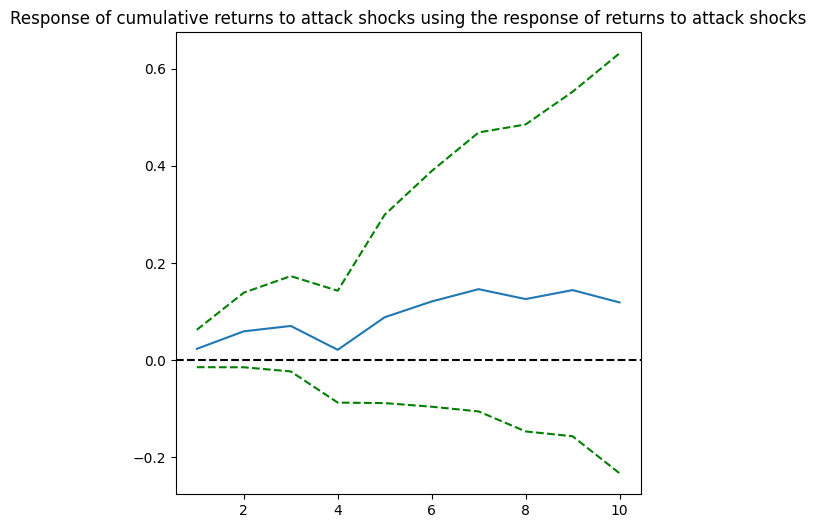

In [81]:
LP_figure(attack_shock)

In [82]:
df = MNCm.set_index(['name', 'time'])

endog = ['returns','Rmkt','attack']
response = endog # estimate the responses of all variables to shocks from all variables
irf_horizon = 10 # estimate IRFs up to 10 periods ahead
opt_lags = 6 # include 6 lags in the local projections model
opt_cov = 'robust' # HAC standard errors
opt_ci = 0.95 # 95% confidence intervals

# Use TimeSeriesLP for the single entity case
irf = lp.TimeSeriesLP(data=df, # input dataframe
                      Y=endog, # variables in the model
                      response=response, # variables whose IRFs should be estimated
                      horizon=irf_horizon, # estimation horizon of IRFs
                      lags=opt_lags, # lags in the model
                      newey_lags=2, # maximum lags when estimating Newey-West standard errors
                      ci_width=opt_ci # width of confidence band
                      )
irfplot = lp.IRFPlot(irf=irf, # take output from the estimated model
                     response=['returns'], # plot only response of invest ...
                     shock=endog, # ... to shocks from all variables
                     n_columns=2, # max 2 columns in the figure
                     n_rows=2, # max 2 rows in the figure
                     maintitle='Single Entity Time Series LP: IRFs of ZEN returns', # self-defined title of the IRF plot
                     show_fig=True, # display figure (from plotly)
                     save_pic=False # don't save any figures on local drive
                     )

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [83]:
result=irf[(irf['Response']=='returns') & ( irf['Shock']=='attack')][['Horizon','Mean','LB','UB']]
result=result.iloc[1:,:]
result['C_effect']=result['Mean'].cumsum()
result['C_UB']=result['UB'].cumsum()
result['C_LB']=result['LB'].cumsum()
for col in ["Mean",	"LB",	"UB",	"C_effect",'C_LB','C_UB']:
  result[col]=np.exp(result[col])-1
attack_shock=result
result

,Horizon,Mean,LB,UB,C_effect,C_UB,C_LB
0,1,-0.041379,-0.103388,0.024918,-0.041379,0.024918,-0.103388
0,2,0.044705,-0.007729,0.099910,0.001476,0.127317,-0.110317
0,3,0.039700,-0.043610,0.130267,0.041235,0.274169,-0.149116
0,4,-0.012566,-0.051639,0.028118,0.028151,0.309996,-0.193056
0,5,-0.016630,-0.047186,0.014907,0.011053,0.329524,-0.231132
0,6,-0.010255,-0.064977,0.047670,0.000684,0.392902,-0.281091
0,7,-0.033579,-0.059218,-0.007241,-0.032917,0.382816,-0.323663
0,8,-0.003170,-0.048176,0.043964,-0.035983,0.443610,-0.356246
0,9,-0.003406,-0.066238,0.063655,-0.039266,0.535503,-0.398887
0,10,0.028155,-0.019732,0.078382,-0.012216,0.655859,-0.410749


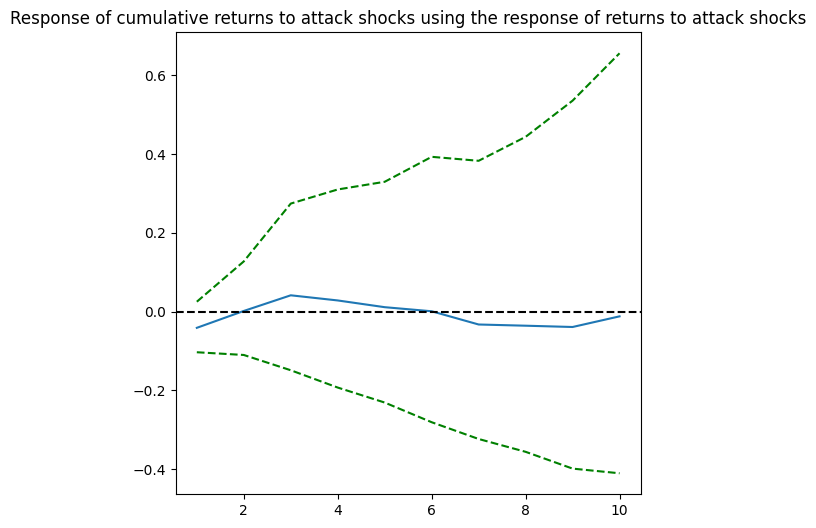

In [84]:
LP_figure(attack_shock)

In [85]:
df = PINm.set_index(['name', 'time'])

endog = ['returns','Rmkt','attack']
response = endog # estimate the responses of all variables to shocks from all variables
irf_horizon = 10 # estimate IRFs up to 10 periods ahead
opt_lags = 6 # include 6 lags in the local projections model
opt_cov = 'robust' # HAC standard errors
opt_ci = 0.95 # 95% confidence intervals

# Use TimeSeriesLP for the single entity case
irf = lp.TimeSeriesLP(data=df, # input dataframe
                      Y=endog, # variables in the model
                      response=response, # variables whose IRFs should be estimated
                      horizon=irf_horizon, # estimation horizon of IRFs
                      lags=opt_lags, # lags in the model
                      newey_lags=2, # maximum lags when estimating Newey-West standard errors
                      ci_width=opt_ci # width of confidence band
                      )
irfplot = lp.IRFPlot(irf=irf, # take output from the estimated model
                     response=['returns'], # plot only response of invest ...
                     shock=endog, # ... to shocks from all variables
                     n_columns=2, # max 2 columns in the figure
                     n_rows=2, # max 2 rows in the figure
                     maintitle='Single Entity Time Series LP: IRFs of ZEN returns', # self-defined title of the IRF plot
                     show_fig=True, # display figure (from plotly)
                     save_pic=False # don't save any figures on local drive
                     )

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/localprojections/lp.py:212: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [86]:
result=irf[(irf['Response']=='returns') & ( irf['Shock']=='attack')][['Horizon','Mean','LB','UB']]
result=result.iloc[1:,:]
result['C_effect']=result['Mean'].cumsum()
result['C_UB']=result['UB'].cumsum()
result['C_LB']=result['LB'].cumsum()
for col in ["Mean",	"LB",	"UB",	"C_effect",'C_LB','C_UB']:
  result[col]=np.exp(result[col])-1
attack_shock=result
result

,Horizon,Mean,LB,UB,C_effect,C_UB,C_LB
0,1,-0.056610,-0.079292,-0.033368,-0.056610,-0.033368,-0.079292
0,2,0.076923,0.005877,0.152987,0.015959,0.114514,-0.073881
0,3,0.038040,0.008579,0.068362,0.054606,0.190704,-0.065936
0,4,0.046586,-0.049897,0.152867,0.103736,0.372723,-0.112543
0,5,-0.065484,-0.105273,-0.023925,0.031459,0.339881,-0.205969
0,6,0.056954,0.020723,0.094471,0.090204,0.466460,-0.189514
0,7,-0.059442,-0.077079,-0.041468,0.025400,0.405649,-0.251985
0,8,-0.231735,-0.255316,-0.207408,-0.212221,0.114106,-0.442965
0,9,0.192622,0.105913,0.286130,-0.060477,0.432885,-0.383968
0,10,-0.203421,-0.225610,-0.180596,-0.251596,0.174111,-0.522951


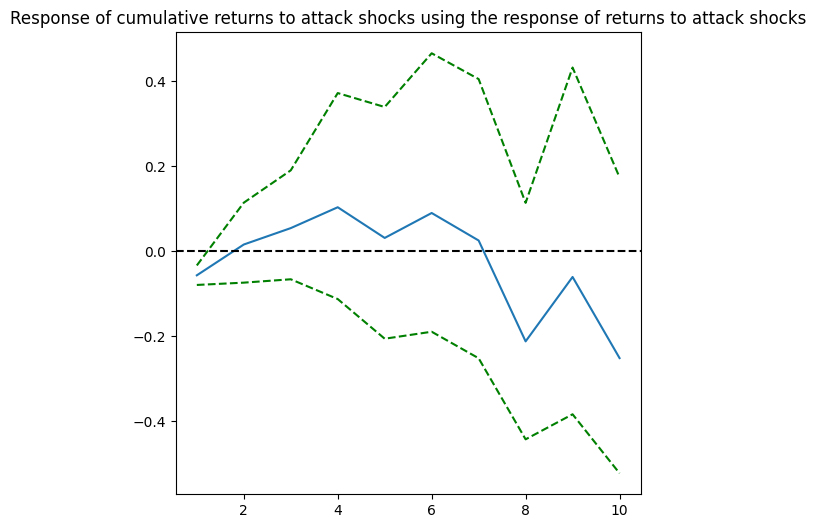

In [87]:
LP_figure(attack_shock)

#Determining the optimal number of lags

In [88]:
from statsmodels.graphics.tsaplots import plot_pacf

In [89]:
from statsmodels.graphics.tsaplots import plot_acf

In [90]:
import matplotlib.pyplot as plt

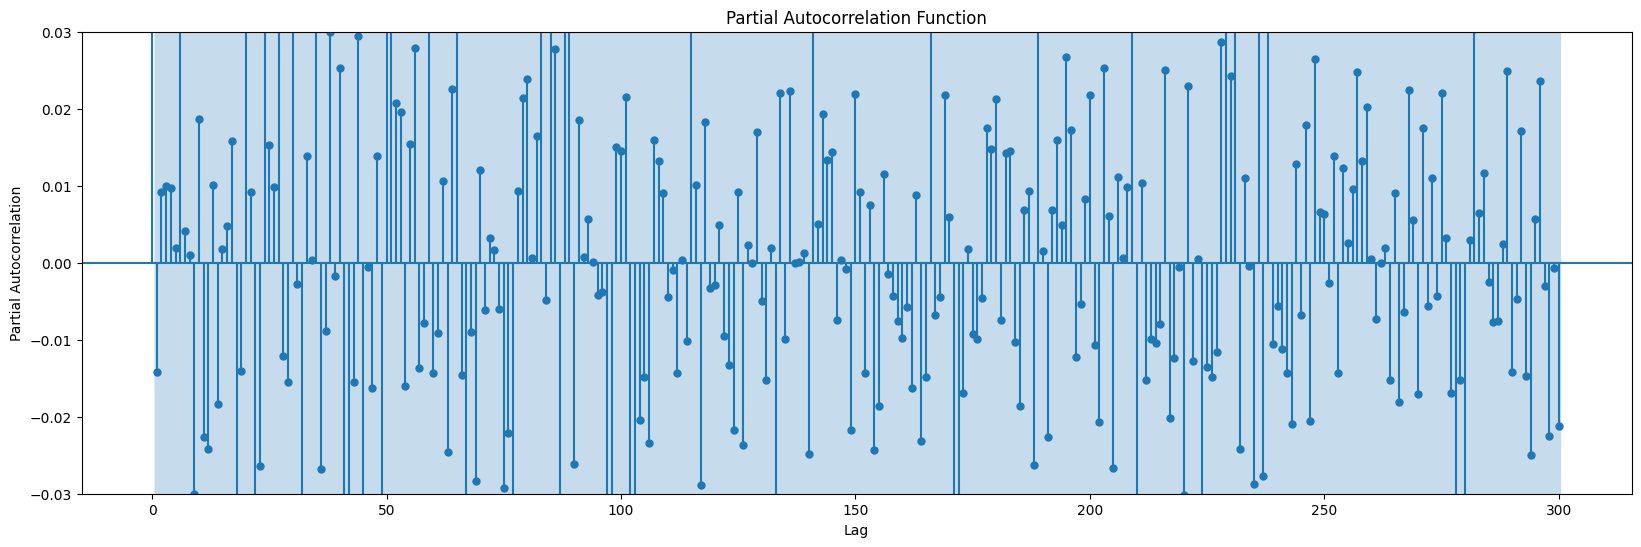

In [91]:
y=list(BTGm['returns'])
plt.rcParams["figure.figsize"] = (20, 6)
# Create the PACF plot
plot_acf(y, lags = 300,)

# Set the y-axis limits
plt.ylim(-0.030, 0.030)  # Adjust the limits as needed

# Add labels, title, etc.
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')

# Display the plot
plt.show()

Text(0.5, 1.0, 'Partial Autocorrelation Function')

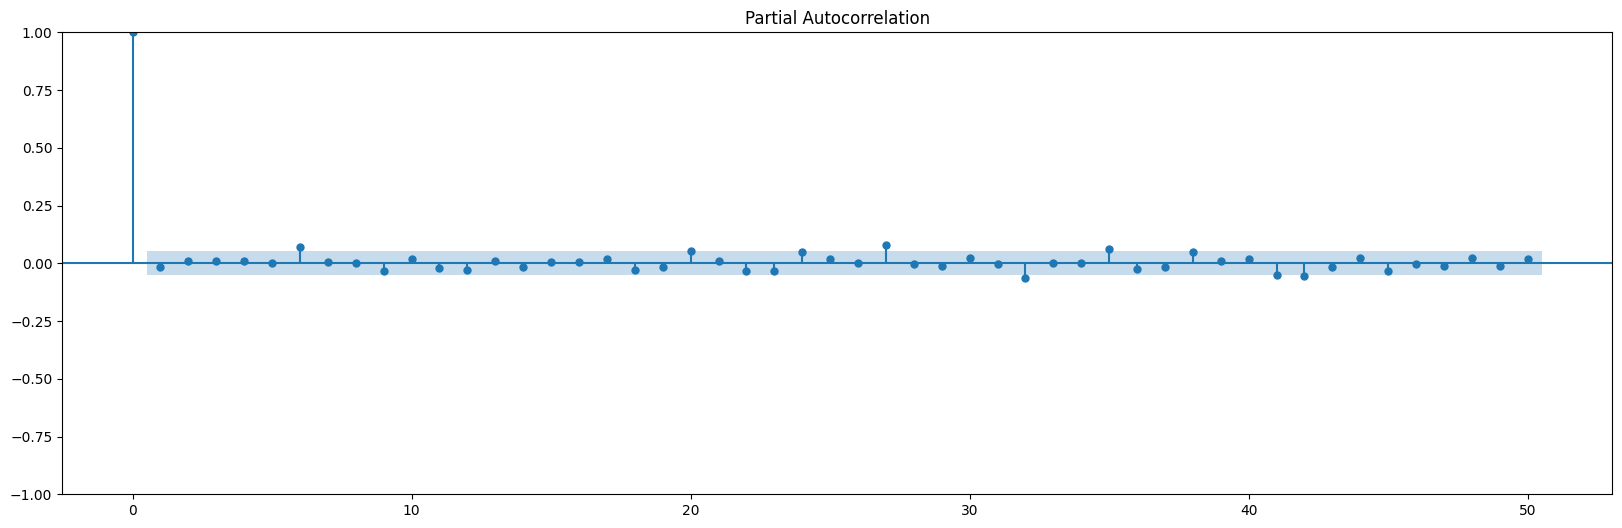

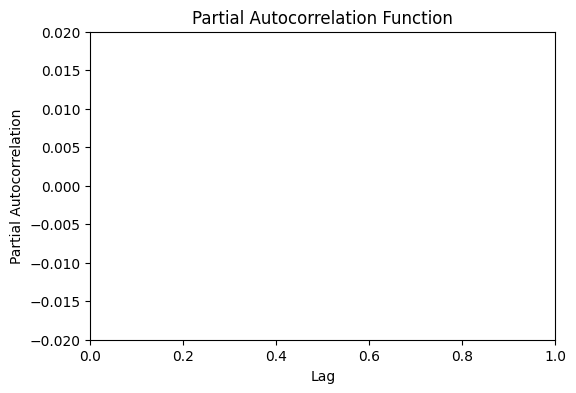

In [93]:
# Create the PACF plot
plot_pacf(y, lags = 50)
plt.figure(figsize=(6,4))
# Set the y-axis limits
plt.ylim(-0.02, 0.02)  # Adjust the limits as needed
# Add labels, title, etc.
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function')

# Display the plot
plt.show()